In [2]:
from statsbombpy import sb
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
euro_matches = sb.matches(competition_id=55, season_id=282)
matches = euro_matches["match_id"]

In [4]:
df_list = []
for i in matches:
    df = sb.events(i)
    df_list.append(df)

events = pd.concat(df_list, ignore_index=True)

In [5]:
passes = events[events["type"] == "Pass"]
passes = passes[[ "pass_length", "pass_angle","pass_height"]]
passes = passes.reset_index(drop=True)
passes

,pass_length,pass_angle,pass_height
0,34.738163,-2.982596,Ground Pass
1,65.695740,0.462286,High Pass
2,30.236732,0.340577,High Pass
3,25.678005,0.316825,High Pass
4,15.160475,2.601173,Ground Pass
...,...,...,...
53885,27.655200,-0.808412,Ground Pass
53886,17.042593,3.012143,Ground Pass
53887,15.110923,1.804540,Ground Pass
53888,12.553884,0.392340,Ground Pass


<Axes: xlabel='pass_angle', ylabel='pass_length'>

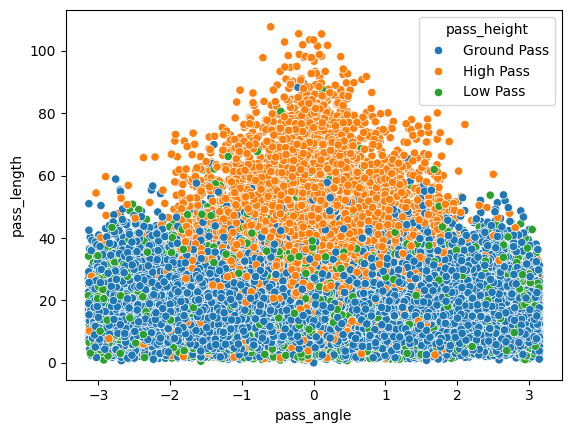

In [6]:
sns.scatterplot(data=passes, x="pass_angle", y="pass_length", hue="pass_height")

In [7]:
X = passes[["pass_length", "pass_angle"]]
y = passes[["pass_height"]] 

In [8]:
kmeans = KMeans()

In [9]:
kmeans.fit(X)

KMeans()

In [10]:
labels = kmeans.labels_

In [11]:
passes["labels"] = labels.tolist()

In [12]:
passes

,pass_length,pass_angle,pass_height,labels
0,34.738163,-2.982596,Ground Pass,5
1,65.695740,0.462286,High Pass,3
2,30.236732,0.340577,High Pass,5
3,25.678005,0.316825,High Pass,2
4,15.160475,2.601173,Ground Pass,0
...,...,...,...,...
53885,27.655200,-0.808412,Ground Pass,2
53886,17.042593,3.012143,Ground Pass,4
53887,15.110923,1.804540,Ground Pass,0
53888,12.553884,0.392340,Ground Pass,0


<Axes: xlabel='pass_angle', ylabel='pass_length'>

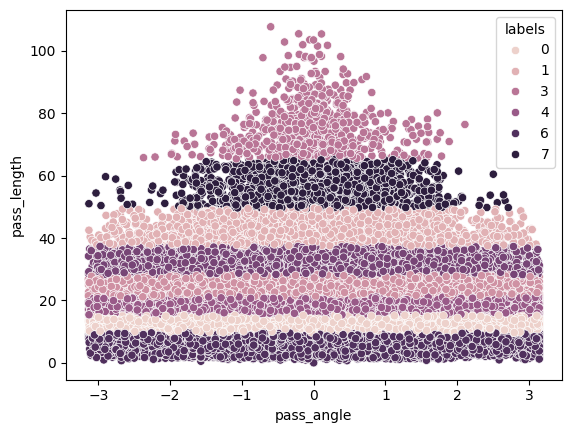

In [13]:
sns.scatterplot(data=passes, x="pass_angle", y="pass_length", hue="labels")